# EDA of Supermarket sales

In [591]:
# Importing the required packages here
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

#visualise plots
%matplotlib inline

In [592]:
df = pd.read_csv("supermarket_sales.csv")

#Preview the first few rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [593]:
#understand the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [594]:
#Explore the numeric data (identified above) further
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [595]:
#Check the number of Invoice IDs
df['Invoice ID'].nunique()

1000

In [596]:
#Drop Invoice ID 
df.drop('Invoice ID',axis=1, inplace=True)

In [597]:
#Check if 'gross margin percentage' is the same for all categories/products 
df['gross margin percentage'].nunique()

1

In [598]:
#Drop gross margin percentage
df.drop('gross margin percentage',axis=1, inplace=True)

In [599]:
#change date and time datatypes
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

#check if it registered
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Branch         1000 non-null   object        
 1   City           1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   datetime64[ns]
 11  Payment        1000 non-null   object        
 12  cogs           1000 non-null   float64       
 13  gross income   1000 non-null   float64       
 14  Rating         1000 non-null   float64       
dtypes: datetime64[ns](2), 

###### For preliminary data visualisation; we will create two separate df; one for numerical columns and one for categorical columns

In [600]:
#numerical and categorical separation

#numerical - eg. histograms, box plots, scatterplots
df_numerical = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating' ]]

#categorical - eg. frequency tables, bar charts, cross tabulation, value counts
df_categorical = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']]

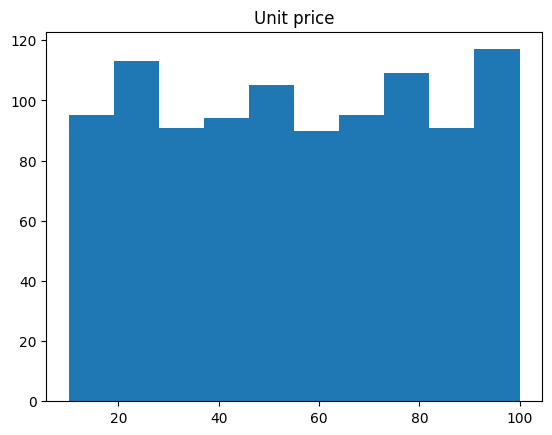

The minimum for Unit price is 10.08
The maximum for Unit price is 99.96


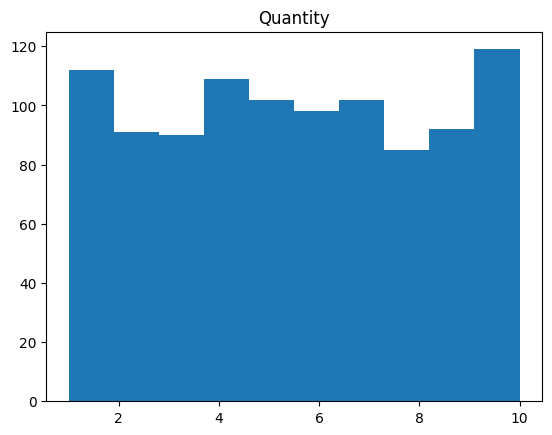

The minimum for Quantity is 1
The maximum for Quantity is 10


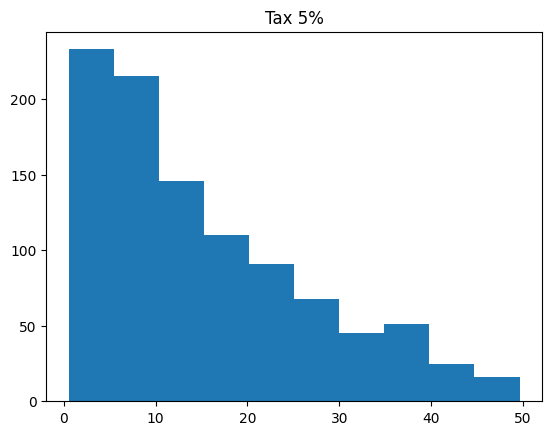

The minimum for Tax 5% is 0.5085
The maximum for Tax 5% is 49.65


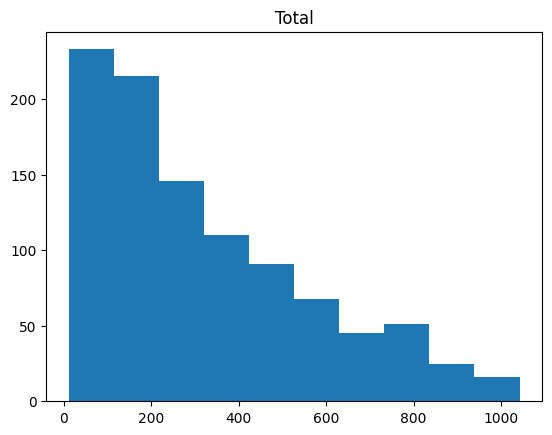

The minimum for Total is 10.6785
The maximum for Total is 1042.65


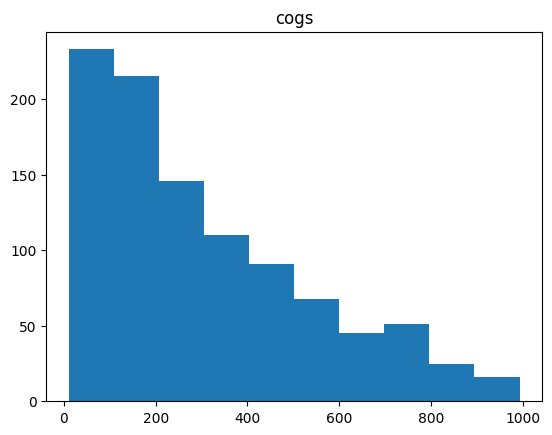

The minimum for cogs is 10.17
The maximum for cogs is 993.0


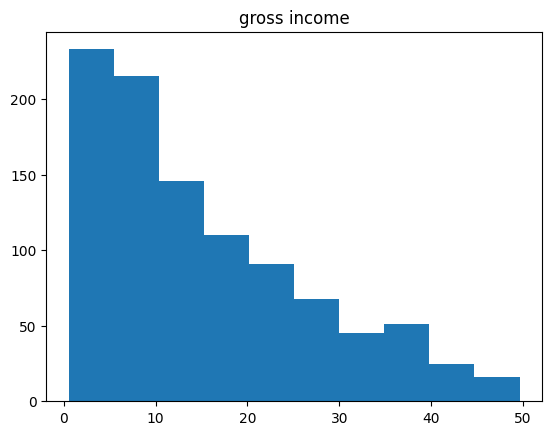

The minimum for gross income is 0.5085
The maximum for gross income is 49.65


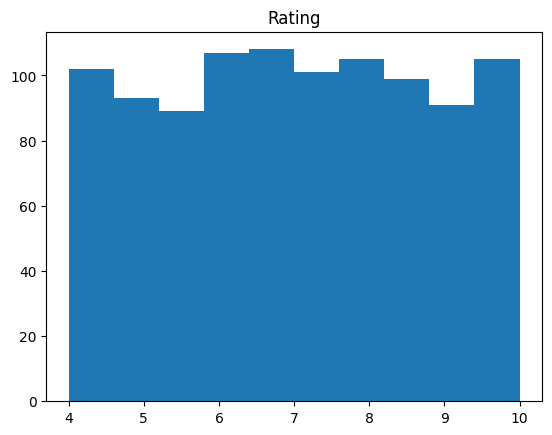

The minimum for Rating is 4.0
The maximum for Rating is 10.0


In [601]:
#visualise the distribution for numeric data
for column in df_numerical.columns:
    plt.hist(df_numerical[column])
    plt.title(column)
    plt.show()
    print(f"The minimum for {column} is {df_numerical[column].min()}")
    print(f"The maximum for {column} is {df_numerical[column].max()}")

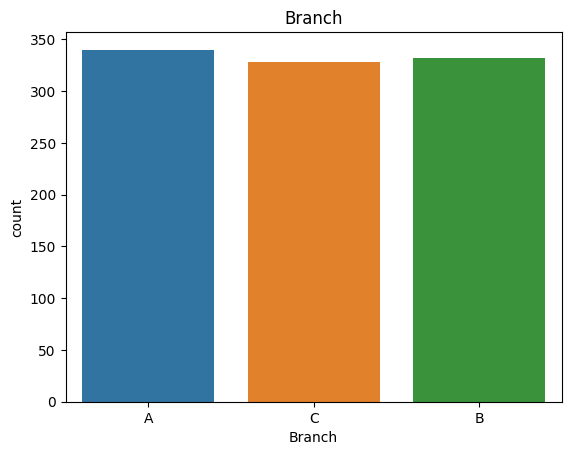

A    340
B    332
C    328
Name: Branch, dtype: int64


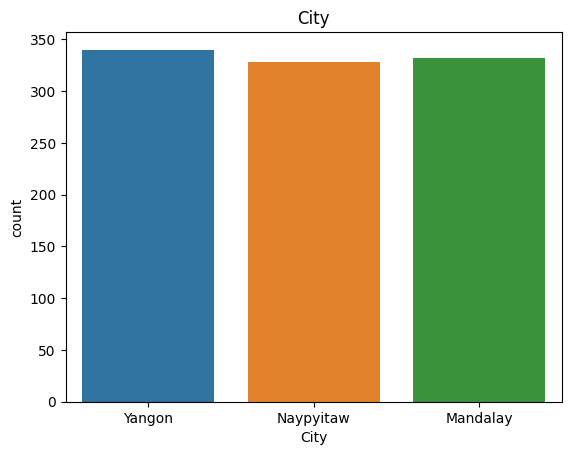

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


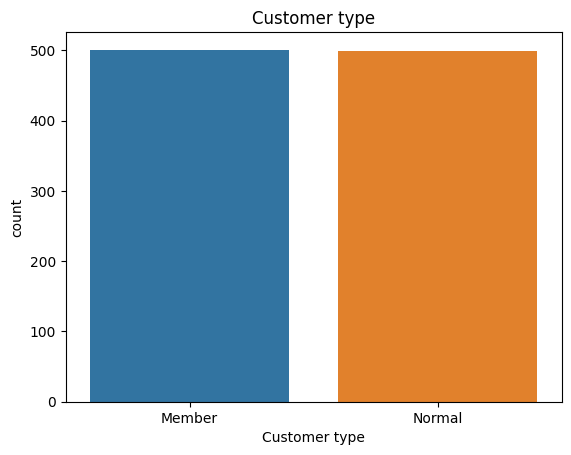

Member    501
Normal    499
Name: Customer type, dtype: int64


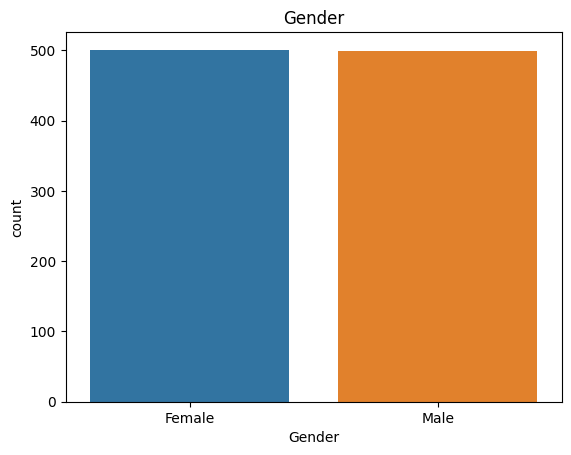

Female    501
Male      499
Name: Gender, dtype: int64


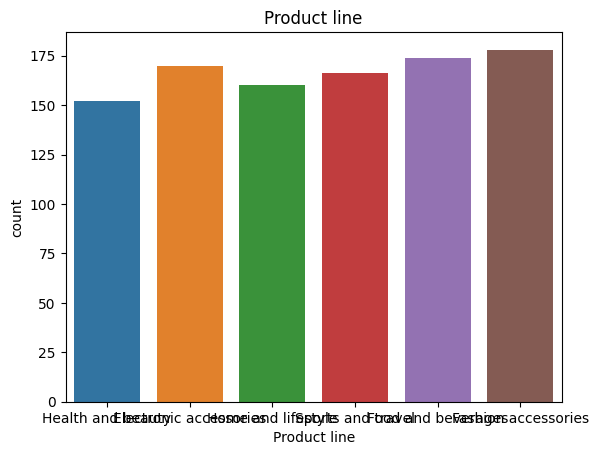

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


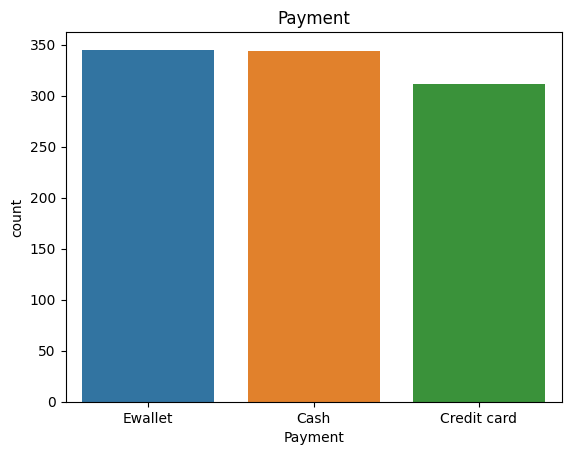

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


In [602]:
#Visualise distribution for catagorical data
for column in df_categorical.columns:
    if df_categorical[column].dtype == 'object':
        sns.countplot(x=df_categorical[column])
        plt.title(column)
        plt.show()
        print(df_categorical[column].value_counts())

In [603]:
#Drop Branch as it does not add more information; 'City' is more informative
df.drop('Branch',axis=1, inplace=True)

#check what we have now before investigating repationships between variables
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,30.2085,5.3


In [604]:
#check for duplicates
print(df.duplicated().sum())

0


## Comparative visualizations

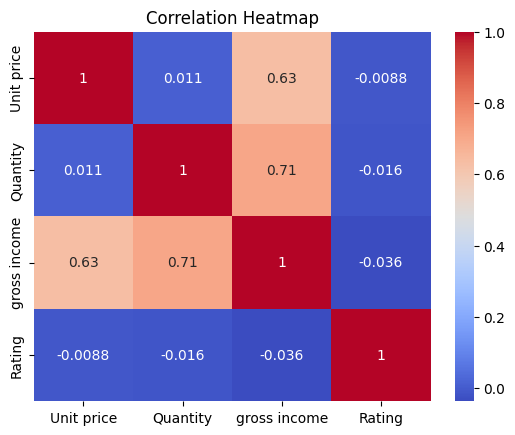

In [605]:
#correlation heatmap of numerical variables
plt.figure()
sns.heatmap(df[['Unit price', 'Quantity','gross income', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

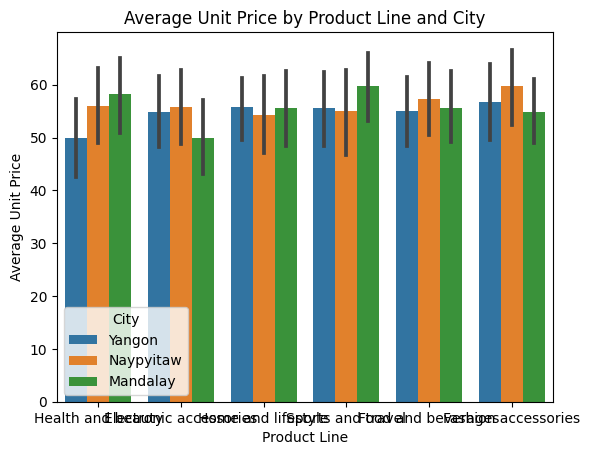

In [606]:
# Grouped bar plot with product line and city as the x-axis, and average unit price as the y-axis
sns.barplot(x='Product line', y='Unit price', hue='City', data=df)
plt.title('Average Unit Price by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price')
plt.show() 

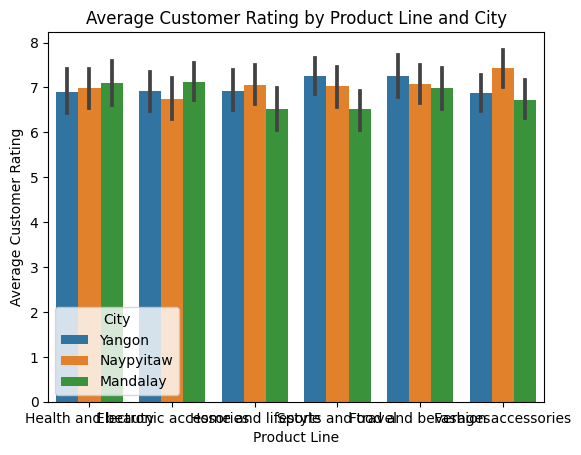

In [607]:
# Grouped bar plot with product line and city as the x-axis, and average rating as the y-axis
sns.barplot(x='Product line', y='Rating', hue='City', data=df)
plt.title('Average Customer Rating by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Average Customer Rating')
plt.show()

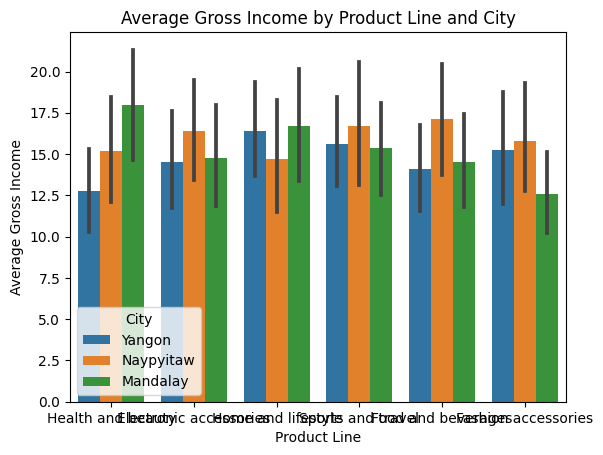

In [608]:
# Grouped bar plot with product line and city as the x-axis, and average gross income as the y-axis
sns.barplot(x='Product line', y='gross income', hue='City', data=df)
plt.title('Average Gross Income by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Average Gross Income')
plt.show()

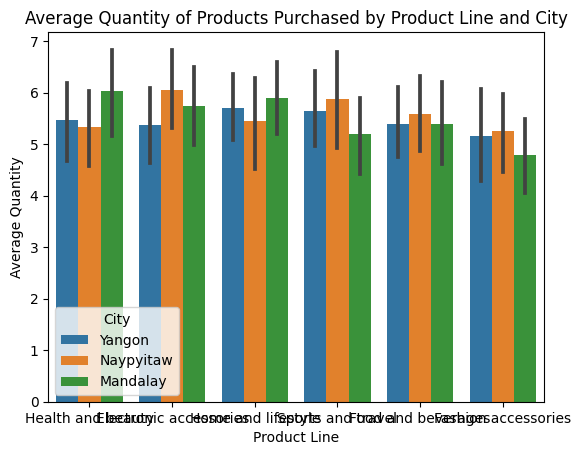

In [609]:
# Grouped bar plot with product line and city as the x-axis, and average quantity as the y-axis
sns.barplot(x='Product line', y='Quantity', hue='City', data=df)
plt.title('Average Quantity of Products Purchased by Product Line and City')
plt.xlabel('Product Line')
plt.ylabel('Average Quantity')
plt.show()

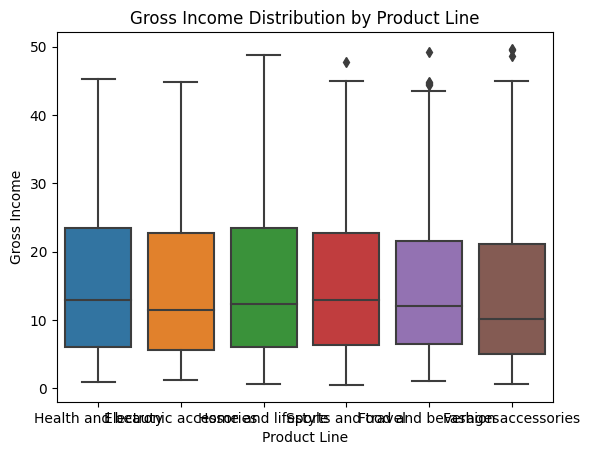

In [610]:
#Bloxplot showing the gross income per product line
sns.boxplot(x='Product line', y='gross income', data=df)
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.title('Gross Income Distribution by Product Line')
plt.show()

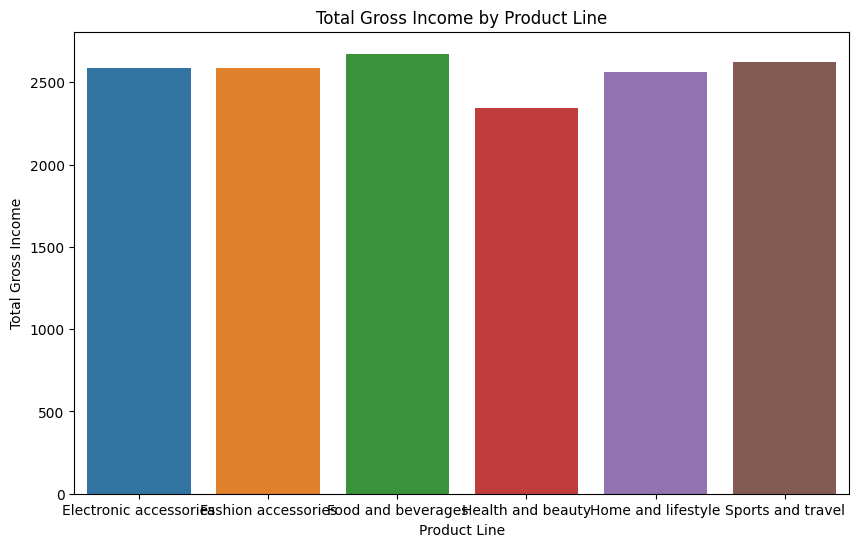

In [611]:
#Barplot with product line  as the x-axis, and total gross income as the y-axis
total_gross_income = df.groupby('Product line')['gross income'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Product line', y='gross income', data=total_gross_income)
plt.title('Total Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.show()

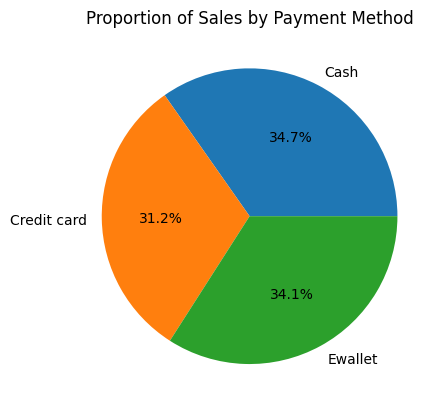

In [612]:
#Pie chart showing the different payment methods and proportion of the gross income stems from each
payment_sales = df.groupby('Payment')['gross income'].sum().reset_index()
plt.pie(payment_sales['gross income'], labels=payment_sales['Payment'], autopct='%1.1f%%')
plt.title('Proportion of Sales by Payment Method')
plt.show()

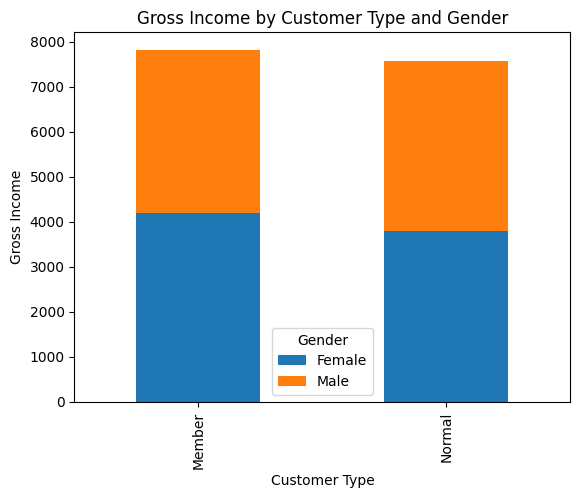

In [613]:
#Stacked barplot showing total gross income with customer type and gender added
df_income = df.groupby(['Customer type', 'Gender'], as_index=False)['gross income'].sum()

# pivot the data to create stacked barplot
df_income_pivot = df_income.pivot(index='Customer type', columns='Gender', values='gross income')
df_income_pivot.plot(kind='bar', stacked=True)
plt.title('Gross Income by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Gross Income')
plt.show()

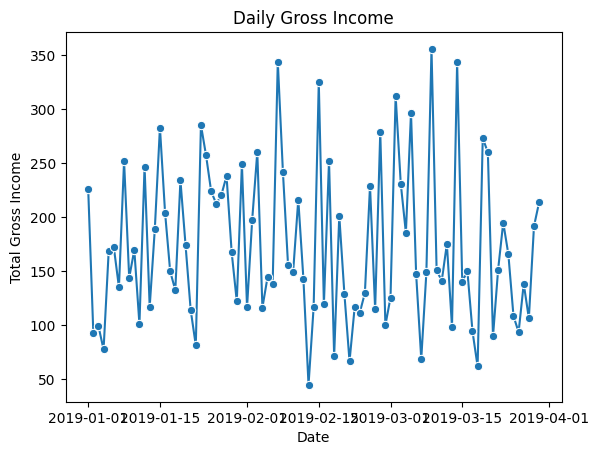

The total gross income for the day with the highest total was $355.907 on 2019-03-09.
The total gross income for the day with the lowest total was $44.4875 on 2019-02-13.


In [614]:
#lineplot showing the total gross income over time
gross_income_over_time = df.groupby('Date')['gross income'].sum().reset_index()

sns.lineplot(x='Date', y='gross income', data=gross_income_over_time, marker='o')
plt.title('Daily Gross Income')
plt.xlabel('Date')
plt.ylabel('Total Gross Income')
plt.show()

# Sort df by 'gross income' in descending order
gross_income_over_time_sorted = gross_income_over_time.sort_values(by='gross income', ascending=False)

# get date and gross income for the day with the highest and lowest totals
highest_income_day = gross_income_over_time_sorted.iloc[0]
lowest_income_day = gross_income_over_time_sorted.iloc[-1]

print(f"The total gross income for the day with the highest total was ${highest_income_day['gross income']} on {highest_income_day['Date'].date()}.")
print(f"The total gross income for the day with the lowest total was ${lowest_income_day['gross income']} on {lowest_income_day['Date'].date()}.")